# Evaluate model calibration using folktexts

**Prerequisite**: Install `folktexts` package with `pip install folktexts` or follow the setup guide in the [README](https://github.com/socialfoundations/folktexts).

**Summary**: The script loads a language model from Huggingface and demonstrates how to use folktexts to get insights into model calibration, and plot the benchmark results. 

### 1. Check folktexts is installed

In [1]:
import folktexts
print(f"{folktexts.__version__=}")

folktexts.__version__='0.0.21'


### 2. Load Model from Huggingface

We use the _Mistral 7B (instruct)_ model for this demo. The workflow can be similarly applied to any model/tokenizer pair.

**Note:** _Set_ `model_name_or_path` to the **model's name on huggingface** or to the **path to a saved pretrained model**.

In [2]:
from folktexts.llm_utils import load_model_tokenizer

# Note: make sure you have the necessary persmissions on Huggingface to download the model
# Note: use gpt2 for the demo if you need a smaller model

model_name_or_path = "mistralai/Mistral-7B-Instruct-v0.2"
# model_name_or_path = "gpt2"

model, tokenizer = load_model_tokenizer(model_name_or_path)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

### 3. Create default benchmarking tasks

We generate ACSIncome benchmark using folktexts. 

**NOTE:** We will subsample the reference data for faster runtime. This should be removed for obtaining reproducible reslts.


### Benchmark configuration
- The `subsampling` and `numeric_risk_prompting` key-word arguments are examples of optional benchmark configurations. See this [page for a list of available configs](https://github.com/socialfoundations/folktexts?tab=readme-ov-file#benchmark-options).

In [3]:
%%time
from folktexts.benchmark import Benchmark, BenchmarkConfig

# Note: This argument is optional. Omit, or set to 1 for reproducible benchmarking on the full data
subsampling_ratio = 0.01

bench = Benchmark.make_acs_benchmark(
    model= model,
    tokenizer=tokenizer,
    task_name="ACSIncome",
    subsampling=subsampling_ratio,
    numeric_risk_prompting=True,
)

Loading ACS data...
Using zero-shot prompting.
CPU times: user 52.4 s, sys: 1min 30s, total: 2min 22s
Wall time: 2min 26s


### 4. Run benchmark

Results will be saved in a folder RESULTS_DIR. There is 
* `.json` file contains evaluated metrics
* `.cvs` file contains risk scores of each datapoint
* folder called `imgs/` contains figures

In [4]:
RESULTS_DIR = "res"
bench.run(results_root_dir=RESULTS_DIR)

Computing risk estimates:   0%|          | 0/105 [00:00<?, ?it/s]

We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)


{'threshold': 0.5,
 'n_samples': 1665,
 'n_positives': 605,
 'n_negatives': 1060,
 'model_name': 'mistralai--Mistral-7B-Instruct-v0.2',
 'accuracy': 0.6816816816816816,
 'tpr': 0.856198347107438,
 'fnr': 0.14380165289256197,
 'fpr': 0.4179245283018868,
 'tnr': 0.5820754716981132,
 'balanced_accuracy': 0.7191369094027756,
 'precision': 0.5390218522372529,
 'ppr': 0.5771771771771772,
 'log_loss': 0.5812465405486003,
 'brier_score_loss': np.float64(0.19836672672672676),
 'tpr_ratio': 0.0,
 'tpr_diff': 1.0,
 'balanced_accuracy_ratio': 0.0,
 'balanced_accuracy_diff': 1.0,
 'accuracy_ratio': 0.0,
 'accuracy_diff': 1.0,
 'fnr_ratio': 0.0,
 'fnr_diff': 1.0,
 'ppr_ratio': 0.0,
 'ppr_diff': 0.6442307692307693,
 'precision_ratio': 0.0,
 'precision_diff': 1.0,
 'tnr_ratio': 0.0,
 'tnr_diff': 1.0,
 'fpr_ratio': 0.0,
 'fpr_diff': 1.0,
 'equalized_odds_ratio': 0.0,
 'equalized_odds_diff': 1.0,
 'roc_auc': np.float64(0.814200842039607),
 'ece': 0.16251051051051124,
 'ece_quantile': None,
 'predictions

### 4. Visualize results

We can also visualize the results inline:

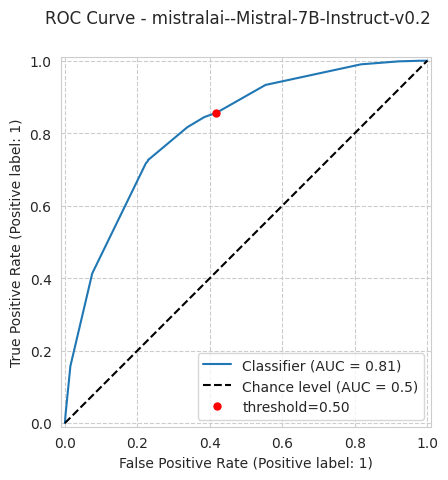

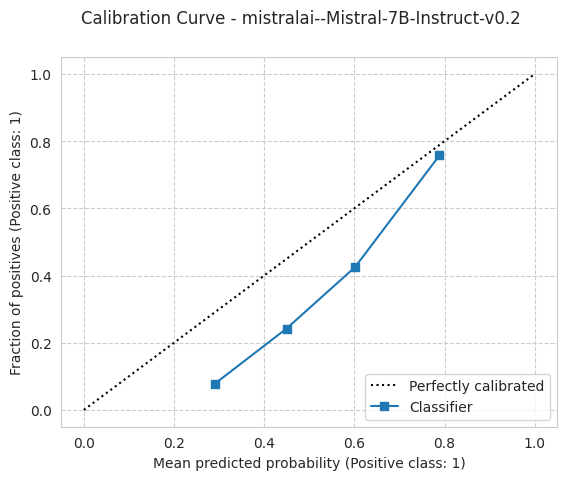

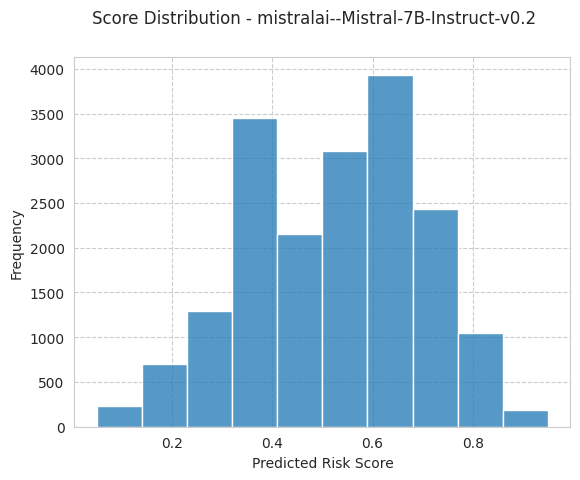

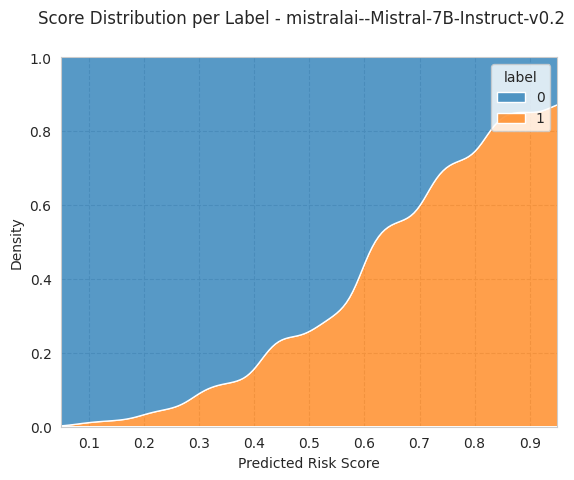

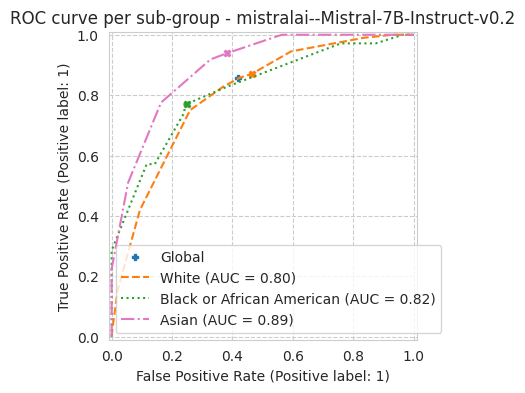

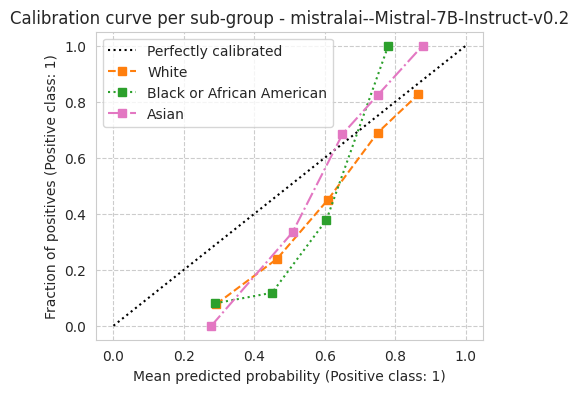

{'roc_curve_path': '/lustre/home/acruz/folktexts/notebooks/res/mistralai--Mistral-7B-Instruct-v0.2_bench-3440007098/imgs/roc_curve.pdf',
 'calibration_curve_path': '/lustre/home/acruz/folktexts/notebooks/res/mistralai--Mistral-7B-Instruct-v0.2_bench-3440007098/imgs/calibration_curve.pdf',
 'score_distribution_path': '/lustre/home/acruz/folktexts/notebooks/res/mistralai--Mistral-7B-Instruct-v0.2_bench-3440007098/imgs/score_distribution.pdf',
 'score_distribution_per_label_path': '/lustre/home/acruz/folktexts/notebooks/res/mistralai--Mistral-7B-Instruct-v0.2_bench-3440007098/imgs/score_distribution_per_label.pdf',
 'roc_curve_per_subgroup_path': '/lustre/home/acruz/folktexts/notebooks/res/mistralai--Mistral-7B-Instruct-v0.2_bench-3440007098/imgs/roc_curve_per_subgroup.pdf',
 'calibration_curve_per_subgroup_path': '/lustre/home/acruz/folktexts/notebooks/res/mistralai--Mistral-7B-Instruct-v0.2_bench-3440007098/imgs/calibration_curve_per_subgroup.pdf'}

In [5]:
bench.plot_results()

---